### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#percentage of data missing by searching the DF for empty fields, this returns
# a dataframe of true or false values, we can either sum it and devide by the total count 
# or get the mean value. Multiplying with 100 would yeild the percentage missing. 

missingDataCount = data.isnull().sum()
totalDataCount = data.shape[0]
missingDF = pd.DataFrame()


missingDF["count"] = data.isnull().sum()
missingDF["percent"] = (missingDataCount/totalDataCount)*100
missingDF.sort_values("count", ascending=False)

#Observations 
#    From above data we can clearly see that car data is 99% missing
#    5 columns coffeeHouse, Restaurant20To50, CarryAway, 
#.   RestaurantLessThan20 and Bar the percentage is less than 2% 

,count,percent
car,12576,99.148534
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582
destination,0,0.000000
passanger,0,0.000000
direction_opp,0,0.000000
direction_same,0,0.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#From above data we can clearly see that car data is 99% missing which is unusable so we can drop it
data = data.drop("car", axis=1)

#with shape you can see that the number of columns has been reduced.
data.shape

#Observations: removed the column with empty data

(12684, 25)

In [7]:
# for other 5 columns coffeeHouse, Restaurant20To50, CarryAway, 
# RestaurantLessThan20 and Bar the percentage
# is less than 2% which we can we can ignore it or adjust by 
# filling the missing values with mean/median or mode
# Mean and median for intger columns and mode(most common) for 
# non-integer columns. Or we could use value_counts

print(data['CoffeeHouse'].mode()[0])
print(data['Restaurant20To50'].mode()[0])
print(data['CarryAway'].mode()[0])
print(data['RestaurantLessThan20'].mode()[0])
print(data['Bar'].mode()[0])

data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)

#We can check that the NaN percentage should be 0 for the above columns
data.isnull().sum()

#Observations: Replaces data for 5 columns based on the popular answer

less1
less1
1~3
1~3
never


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
#To find how many accepted we have to group the result based on column Y and then find the count of each output
acceptedOrNot = data.groupby('Y')["Y"].count()
print(acceptedOrNot)

#devide this count with the total number of rows and multiply by 100 for the percent
print("Acceptance Percent ", (acceptedOrNot[1]/data.shape[0]*100))
print("Rejection Percent ", (acceptedOrNot[0]/data.shape[0]*100))

#observations: 56% of the total coupons were accepted.

Y
0    5474
1    7210
Name: Y, dtype: int64
Acceptance Percent  56.84326710816777
Rejection Percent  43.15673289183223


5. Use a bar plot to visualize the `coupon` column.

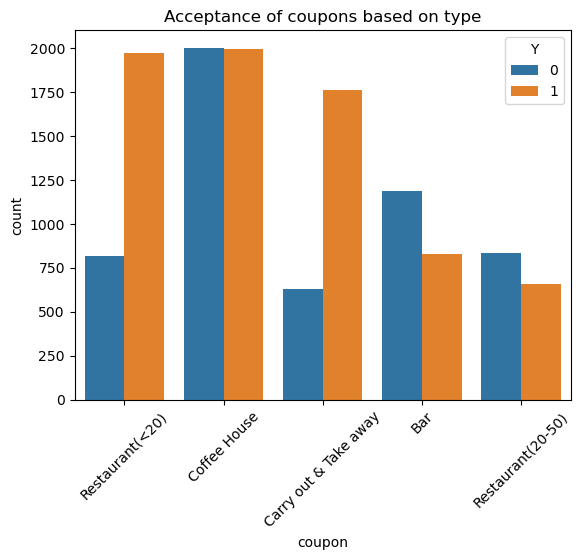

In [9]:
# We can use SNS countplot to display a barplot for coupon categories. 
# segregate the results based on acceptance
# column 'Y'. Adjust the title/and xlabel rotation and save figure in images folder

sns.countplot(data, x='coupon', hue='Y')
plt.title("Acceptance of coupons based on type")
plt.xticks(rotation=45)
plt.savefig("images/CouponAcceptanceCountBarPlot.png")

#Observations :
# We can clearly see that Restaurant(<20) and carry out takeway are the 
# top categories where people accepted the coupons.
# Bar and Restaurant(20-50) has lower acceptance.

6. Use a histogram to visualize the temperature column.

temperature  Y
30           1    0.531088
             0    0.468912
55           1    0.536719
             0    0.463281
80           1    0.600337
             0    0.399663
Name: Y, dtype: float64


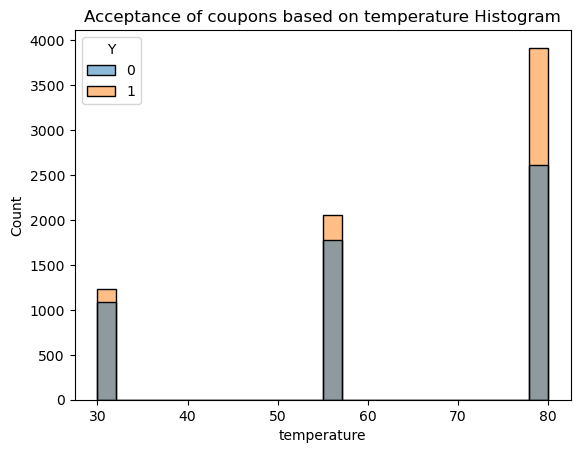

In [10]:
#Budling a histplot with temprature columns with hue as acceptance.
tempAcceptedData = data.groupby("temperature")["Y"].value_counts()/data.groupby("temperature")["Y"].count()
print(tempAcceptedData)
sns.histplot(data, x = "temperature", hue='Y')
plt.title("Acceptance of coupons based on temperature Histogram")
plt.savefig("images/CouponAcceptanceCountHistPlot.png")

#Observations: We can observe that higher temperatures tend to have higher acceptance rate

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
#To create dataframe we can use filter function to only select values for Bar category

barDF = data[data["coupon"]=="Bar"]
barDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null  

2. What proportion of bar coupons were accepted?


In [12]:
#To find how many accepted we have to group the result based on column Y 
# and then find the count of each output
acceptedOrNot = barDF.groupby('Y')["Y"].count()
print(acceptedOrNot)

#devide this count with the total number of rows and multiply by 100 for the percent
print("Acceptance Percent ", (acceptedOrNot[1]/barDF.shape[0]*100))
print("Rejection Percent ", (acceptedOrNot[0]/barDF.shape[0]*100))

#Observations: 41% of bar coupons were accepted. 

Y
0    1190
1     827
Name: Y, dtype: int64
Acceptance Percent  41.00148735746158
Rejection Percent  58.99851264253842


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


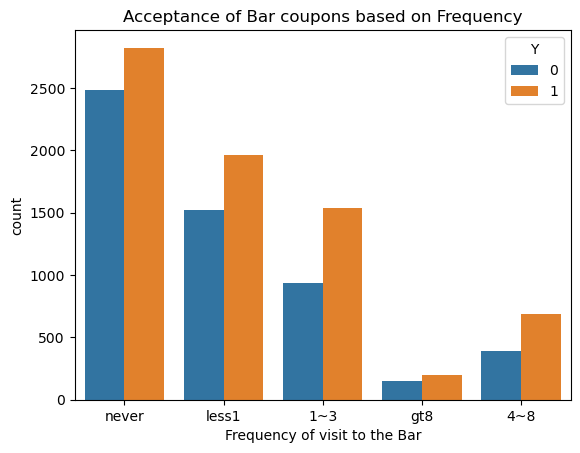

In [13]:
# Building a countplot for BAR coulumn based on Y for better visualization
sns.countplot(data, x='Bar', hue='Y')
plt.title("Acceptance of Bar coupons based on Frequency")
plt.xlabel("Frequency of visit to the Bar")
plt.savefig("images/CouponAcceptanceCountForBarFrequencyPlot.png")

In [14]:
#Create a filter list for less than 3 visits and more than 3 visits
list3orFewer = ["never", "less1", "1~3"]
list3orGreater= ["gt8", "4~8"]
#Query the barD for above categories group them by acceptance and count the results

acceptedOrNotLt3 = barDF.query('Bar in @list3orFewer')
acceptedOrNotLt3Count = barDF.query('Bar in @list3orFewer').groupby('Y')["Y"].count()

acceptedOrNotGt3 = barDF.query('Bar in @list3orGreater')
acceptedOrNotGt3Count = acceptedOrNotGt3.groupby('Y')["Y"].count()


#devide this count with the total number of rows and multiply by 100 for the percent
print("Acceptance Percent with 3 or less visits", (acceptedOrNotLt3Count[1]/len(acceptedOrNotLt3)*100))
print("Acceptance Percent with more than 3 visits ", (acceptedOrNotGt3Count[1]/len(acceptedOrNotGt3)*100))


#Observations: We can see a better coupon acceptance rate with people 
# who have visited the Bar MORE than 3 times a month.

Acceptance Percent with 3 or less visits 37.073707370737075
Acceptance Percent with more than 3 visits  76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
#Create a filter list for more than 1 visits and more
list1orGreater = ["1~3", "gt8", "4~8"]

#Find unique age values
print(barDF['age'].unique())
listAgeGt25 = ['46','26', '31' ,'41' ,'50plus' ,'36']

#query the barDf for visit >1 and age >25
acceptedOrNotGt1 = barDF.query('(Bar in @list1orGreater) & (age in @listAgeGt25)')
acceptedOrNotGt1Count = acceptedOrNotGt1.groupby('Y')["Y"].count()

#Get the percentage acceptance rate
acceptedOrNotGt1Rate = acceptedOrNotGt1Count[1]/len(acceptedOrNotGt1)*100
print(acceptedOrNotGt1Rate)

#query the barDf for rest (complement to the above dataset)
acceptedOrNotLt1 = barDF.query('(Bar not in @list1orGreater) | (age not in @listAgeGt25)')

acceptedOrNotLt1Count = acceptedOrNotLt1.groupby('Y')["Y"].count()
acceptedOrNotLt1Rate = acceptedOrNotLt1Count[1]/len(acceptedOrNotLt1)*100

print("Acceptance Percent more than 1 visit, age >25 ", acceptedOrNotGt1Rate)
print("Acceptance Percent rest ", acceptedOrNotLt1Rate)

#Observations: Acceptance rate for >1 visit and age >25 is 69 % 
# which is much heigher for the rest of the group of 33%

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
69.52380952380952
Acceptance Percent more than 1 visit, age >25  69.52380952380952
Acceptance Percent rest  33.500313087038194


Text(0.5, 0, 'Number of visits to Bar in a month')

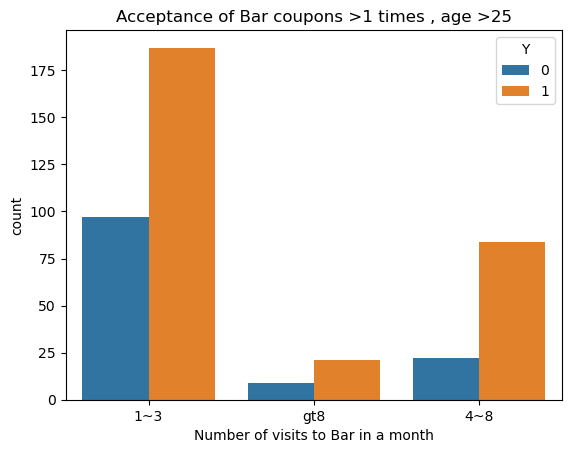

In [16]:
sns.countplot(acceptedOrNotGt1, x='Bar', hue='Y')
plt.title("Acceptance of Bar coupons >1 times , age >25")
plt.xlabel("Number of visits to Bar in a month")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [17]:
#Create a filter list for more than 1 visits and more
list1orGreater = ["1~3", "gt8", "4~8"]

#Find unique passanger values
print(barDF['passanger'].unique())
#notKid Passlist
passList = ['Friend(s)' ,'Partner']

#not occupation list
occList = ["farming", "fishing", "forestry"]


#query the barDf for visit >1 and pass not Kid
accOccList = barDF.query('(Bar in @list1orGreater) & (passanger in @passList) & (occupation not in @occList)')
accOccListCount = accOccList.groupby('Y')["Y"].count()

#Get the percentage acceptance rate
accOccListRate = accOccListCount[1]/len(accOccList)*100


#query the barDf for rest (complement to the above dataset)
accOccListRest = barDF.query('(Bar not in @list1orGreater) | (passanger not in @passList) | (occupation in @occList)')

accOccListRestCount = accOccListRest.groupby('Y')["Y"].count()
accOccListRestRate = accOccListRestCount[1]/len(accOccListRest)*100

print("Acceptance Percent more than 1 visit, no kid pass, no occ ", accOccListRate)
print("Acceptance Percent rest ", accOccListRestRate)


#Observations: Acceptance rate for >1 visit and no kid pass and not in the
# ocuupation list is 71 % which is much heigher for the rest of the group of 37%

['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Acceptance Percent more than 1 visit, no kid pass, no occ  71.7948717948718
Acceptance Percent rest  37.70581778265642


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
#Create a filter list for more than 1 visits and more
list1orGreater = ["1~3", "gt8", "4~8"]

#Find unique passanger values
#notKid Passlist
passList = ['Friend(s)' ,'Partner']


#query the barDf for visit >1 and pass not Kid +not widowed
wisdowList = barDF.query('(Bar in @list1orGreater) & (passanger in @passList) & (maritalStatus != "Widowed")')
wisdowListCount = wisdowList.groupby('Y')["Y"].count()

#Get the percentage acceptance rate
wisdowListRate = wisdowListCount[1]/len(wisdowList)*100


print("Acceptance >1 bar visit, no pass kid, not widowed ", wisdowListRate)


#Second ---> 
#Find unique age values below age 30 > 1visit to bar

listAgeLt30 = ['21', '26','below21']
               
AgeList = barDF.query('(Bar in @list1orGreater) & (age in @listAgeLt30)')
AgeListCount = AgeList.groupby('Y')["Y"].count()

#Get the percentage acceptance rate
AgeListRate = AgeListCount[1]/len(AgeList)*100


print("Acceptance >1 bar visit, <30 age", AgeListRate)

#Third --->
incomeLt50k = ['$37500 - $49999','$25000 - $37499']
RestaurantLessThan20List = ['4~8','gt8']

cheapRestList = barDF.query('(income in @incomeLt50k) & (RestaurantLessThan20 in @RestaurantLessThan20List)')
cheapRestListCount = cheapRestList.groupby('Y')["Y"].count()

#Get the percentage acceptance rate
cheapRestListRate = cheapRestListCount[1]/len(cheapRestList)*100


print("Acceptance >4 visit to cheap restaurant, <50k income", cheapRestListRate)



Acceptance >1 bar visit, no pass kid, not widowed  71.7948717948718
Acceptance >1 bar visit, <30 age 72.17391304347827
Acceptance >4 visit to cheap restaurant, <50k income 47.093023255813954


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [19]:
# Drivers with passanger as not kids accepted more coupons and visited the bar more times. 
# Also Drivers whose age is below 30 were more acceptance toweds the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Text(0.5, 1.0, 'Acceptance of coupons based on Age')

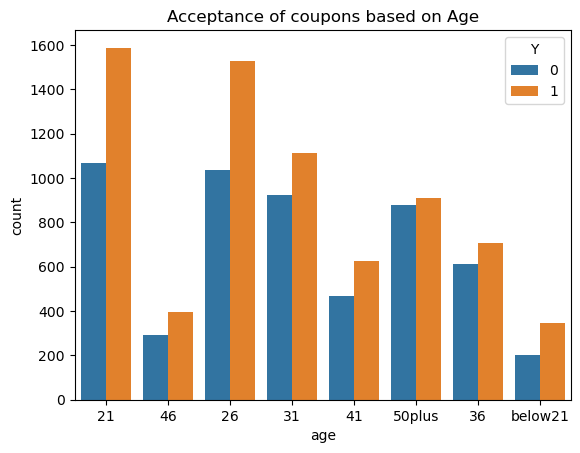

In [20]:
#Agewaise acceptance

sns.countplot(data, x='age', hue='Y')
plt.title("Acceptance of coupons based on Age")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, '$62500 - $74999'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$75000 - $87499'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

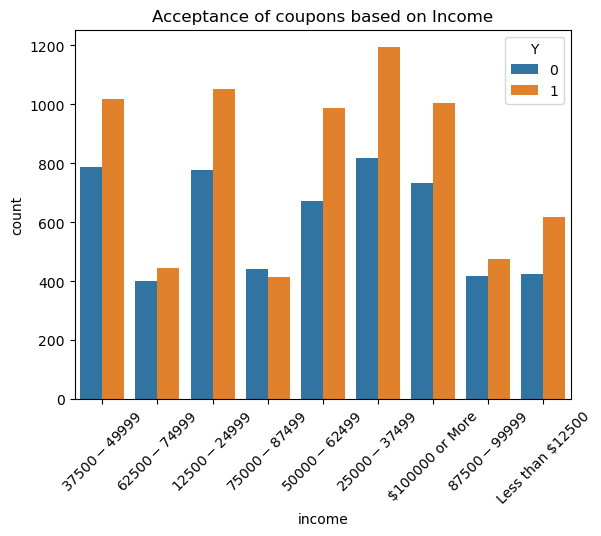

In [21]:
#Income acceptance

sns.countplot(data, x='income', hue='Y')
plt.title("Acceptance of coupons based on Income")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21, 0, 'Food Preparation &

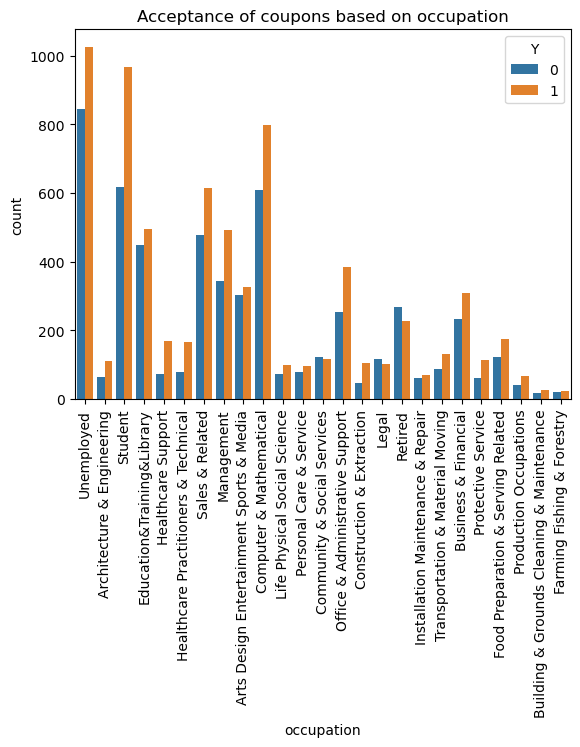

In [27]:

sns.countplot(data, x='occupation', hue='Y')
plt.title("Acceptance of coupons based on occupation")
plt.xticks(rotation=90)



In [ ]:
# Students and unemployed people are more willing of coupons

Text(0.5, 1.0, 'Acceptance of coupons based on destination')

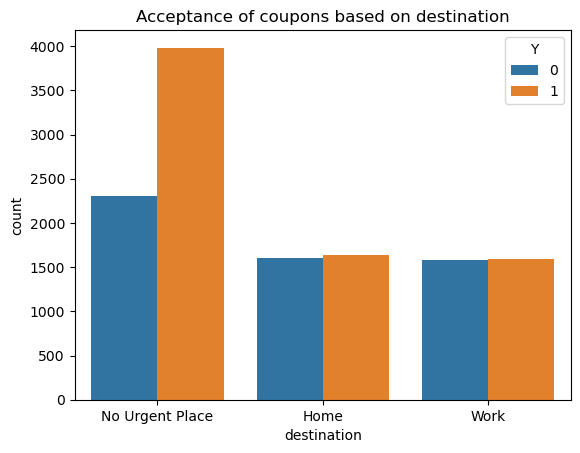

In [25]:
sns.countplot(data, x='destination', hue='Y')
plt.title("Acceptance of coupons based on destination")


In [ ]:
#From above plot it is clear that acceptance rate is better in driver who are
#not in a hurry to go anywhere.